In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import random

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, QuantileTransformer

from sklearn.metrics  import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, \
roc_auc_score, precision_recall_curve, auc, cohen_kappa_score, log_loss, matthews_corrcoef, \
balanced_accuracy_score, top_k_accuracy_score, r2_score, explained_variance_score

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier

from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
data =  pd.read_csv("merged_data.csv", low_memory=False)
data = data.drop(columns=["Unnamed: 0"])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577621 entries, 0 to 577620
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   issue_d               577621 non-null  object 
 1   sub_grade             577621 non-null  object 
 2   term                  577621 non-null  int64  
 3   home_ownership        577621 non-null  object 
 4   fico_range_low        577621 non-null  float64
 5   total_acc             577621 non-null  float64
 6   pub_rec               577621 non-null  float64
 7   revol_util            577621 non-null  float64
 8   annual_inc            577621 non-null  float64
 9   int_rate              577621 non-null  float64
 10  dti                   577621 non-null  float64
 11  purpose               577621 non-null  object 
 12  mort_acc              577621 non-null  float64
 13  loan_amnt             577621 non-null  float64
 14  application_type      577621 non-null  object 
 15  

In [4]:
data.isna().sum()

issue_d                 0
sub_grade               0
term                    0
home_ownership          0
fico_range_low          0
total_acc               0
pub_rec                 0
revol_util              0
annual_inc              0
int_rate                0
dti                     0
purpose                 0
mort_acc                0
loan_amnt               0
application_type        0
installment             0
verification_status     0
pub_rec_bankruptcies    0
state                   0
initial_list_status     0
fico_range_high         0
revol_bal               0
id                      0
open_acc                0
emp_length              0
loan_status             0
earliest_cr_line        0
dtype: int64

In [5]:
data.describe()

,term,fico_range_low,total_acc,pub_rec,revol_util,annual_inc,int_rate,dti,mort_acc,loan_amnt,installment,pub_rec_bankruptcies,fico_range_high,revol_bal,id,open_acc,emp_length,loan_status
count,577621.000000,577621.000000,577621.000000,577621.000000,577621.000000,5.776210e+05,577621.000000,577621.000000,577621.000000,577621.000000,577621.000000,577621.000000,577621.000000,5.776210e+05,5.776210e+05,577621.000000,577621.000000,577621.000000
mean,41.748614,685.602421,25.727167,0.207643,53.736715,7.657143e+04,13.309011,18.037212,1.775758,14576.650260,444.323956,0.130766,694.032415,1.652593e+04,5.262167e+07,11.676577,6.015877,0.457440
std,10.243064,21.904653,12.021958,0.601682,23.999607,6.874230e+04,4.536597,8.614854,2.103979,8488.340818,254.381688,0.374746,20.844643,2.228642e+04,2.423967e+07,5.353583,3.897660,0.498186
min,36.000000,656.515750,2.000000,0.000000,0.000000,0.000000e+00,5.320000,0.000000,0.000000,1000.000000,14.770000,0.000000,649.839600,0.000000e+00,5.670500e+04,0.000000,0.000000,0.000000
25%,36.000000,673.865900,17.000000,0.000000,36.000000,4.680000e+04,9.800000,11.780000,0.000000,8000.000000,259.800000,0.000000,684.000000,6.229000e+03,3.261866e+07,8.000000,2.000000,0.000000
50%,36.000000,680.000000,24.000000,0.000000,54.400000,6.500000e+04,12.990000,17.490000,1.000000,12500.000000,385.330000,0.000000,692.318700,1.145200e+04,5.421872e+07,11.000000,6.000000,0.000000
75%,36.000000,690.000000,33.000000,0.000000,72.300000,9.050000e+04,16.290000,23.850000,3.000000,20000.000000,586.910000,0.000000,696.805800,2.017300e+04,7.174707e+07,14.000000,10.000000,1.000000
max,60.000000,845.000000,169.000000,86.000000,892.300000,9.573072e+06,30.990000,999.000000,47.000000,40000.000000,1534.880000,9.000000,850.000000,2.560703e+06,9.999972e+07,90.000000,11.000000,1.000000


## Data Analysis

#### Numerical Features

In [6]:
num_columns = data.describe().columns.to_list()
num_columns.remove("id")

In [7]:
for col in num_columns:
    data[col] = pd.to_numeric(data[col], downcast='float')

C:\Users\axelo\AppData\Local\Temp\ipykernel_18076\62274609.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[f"{column}"], ax=ax[i]);
C:\Users\axelo\AppData\Local\Temp\ipykernel_18076\62274609.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[f"{column}"], ax=ax[i]);
C:\Users\axelo

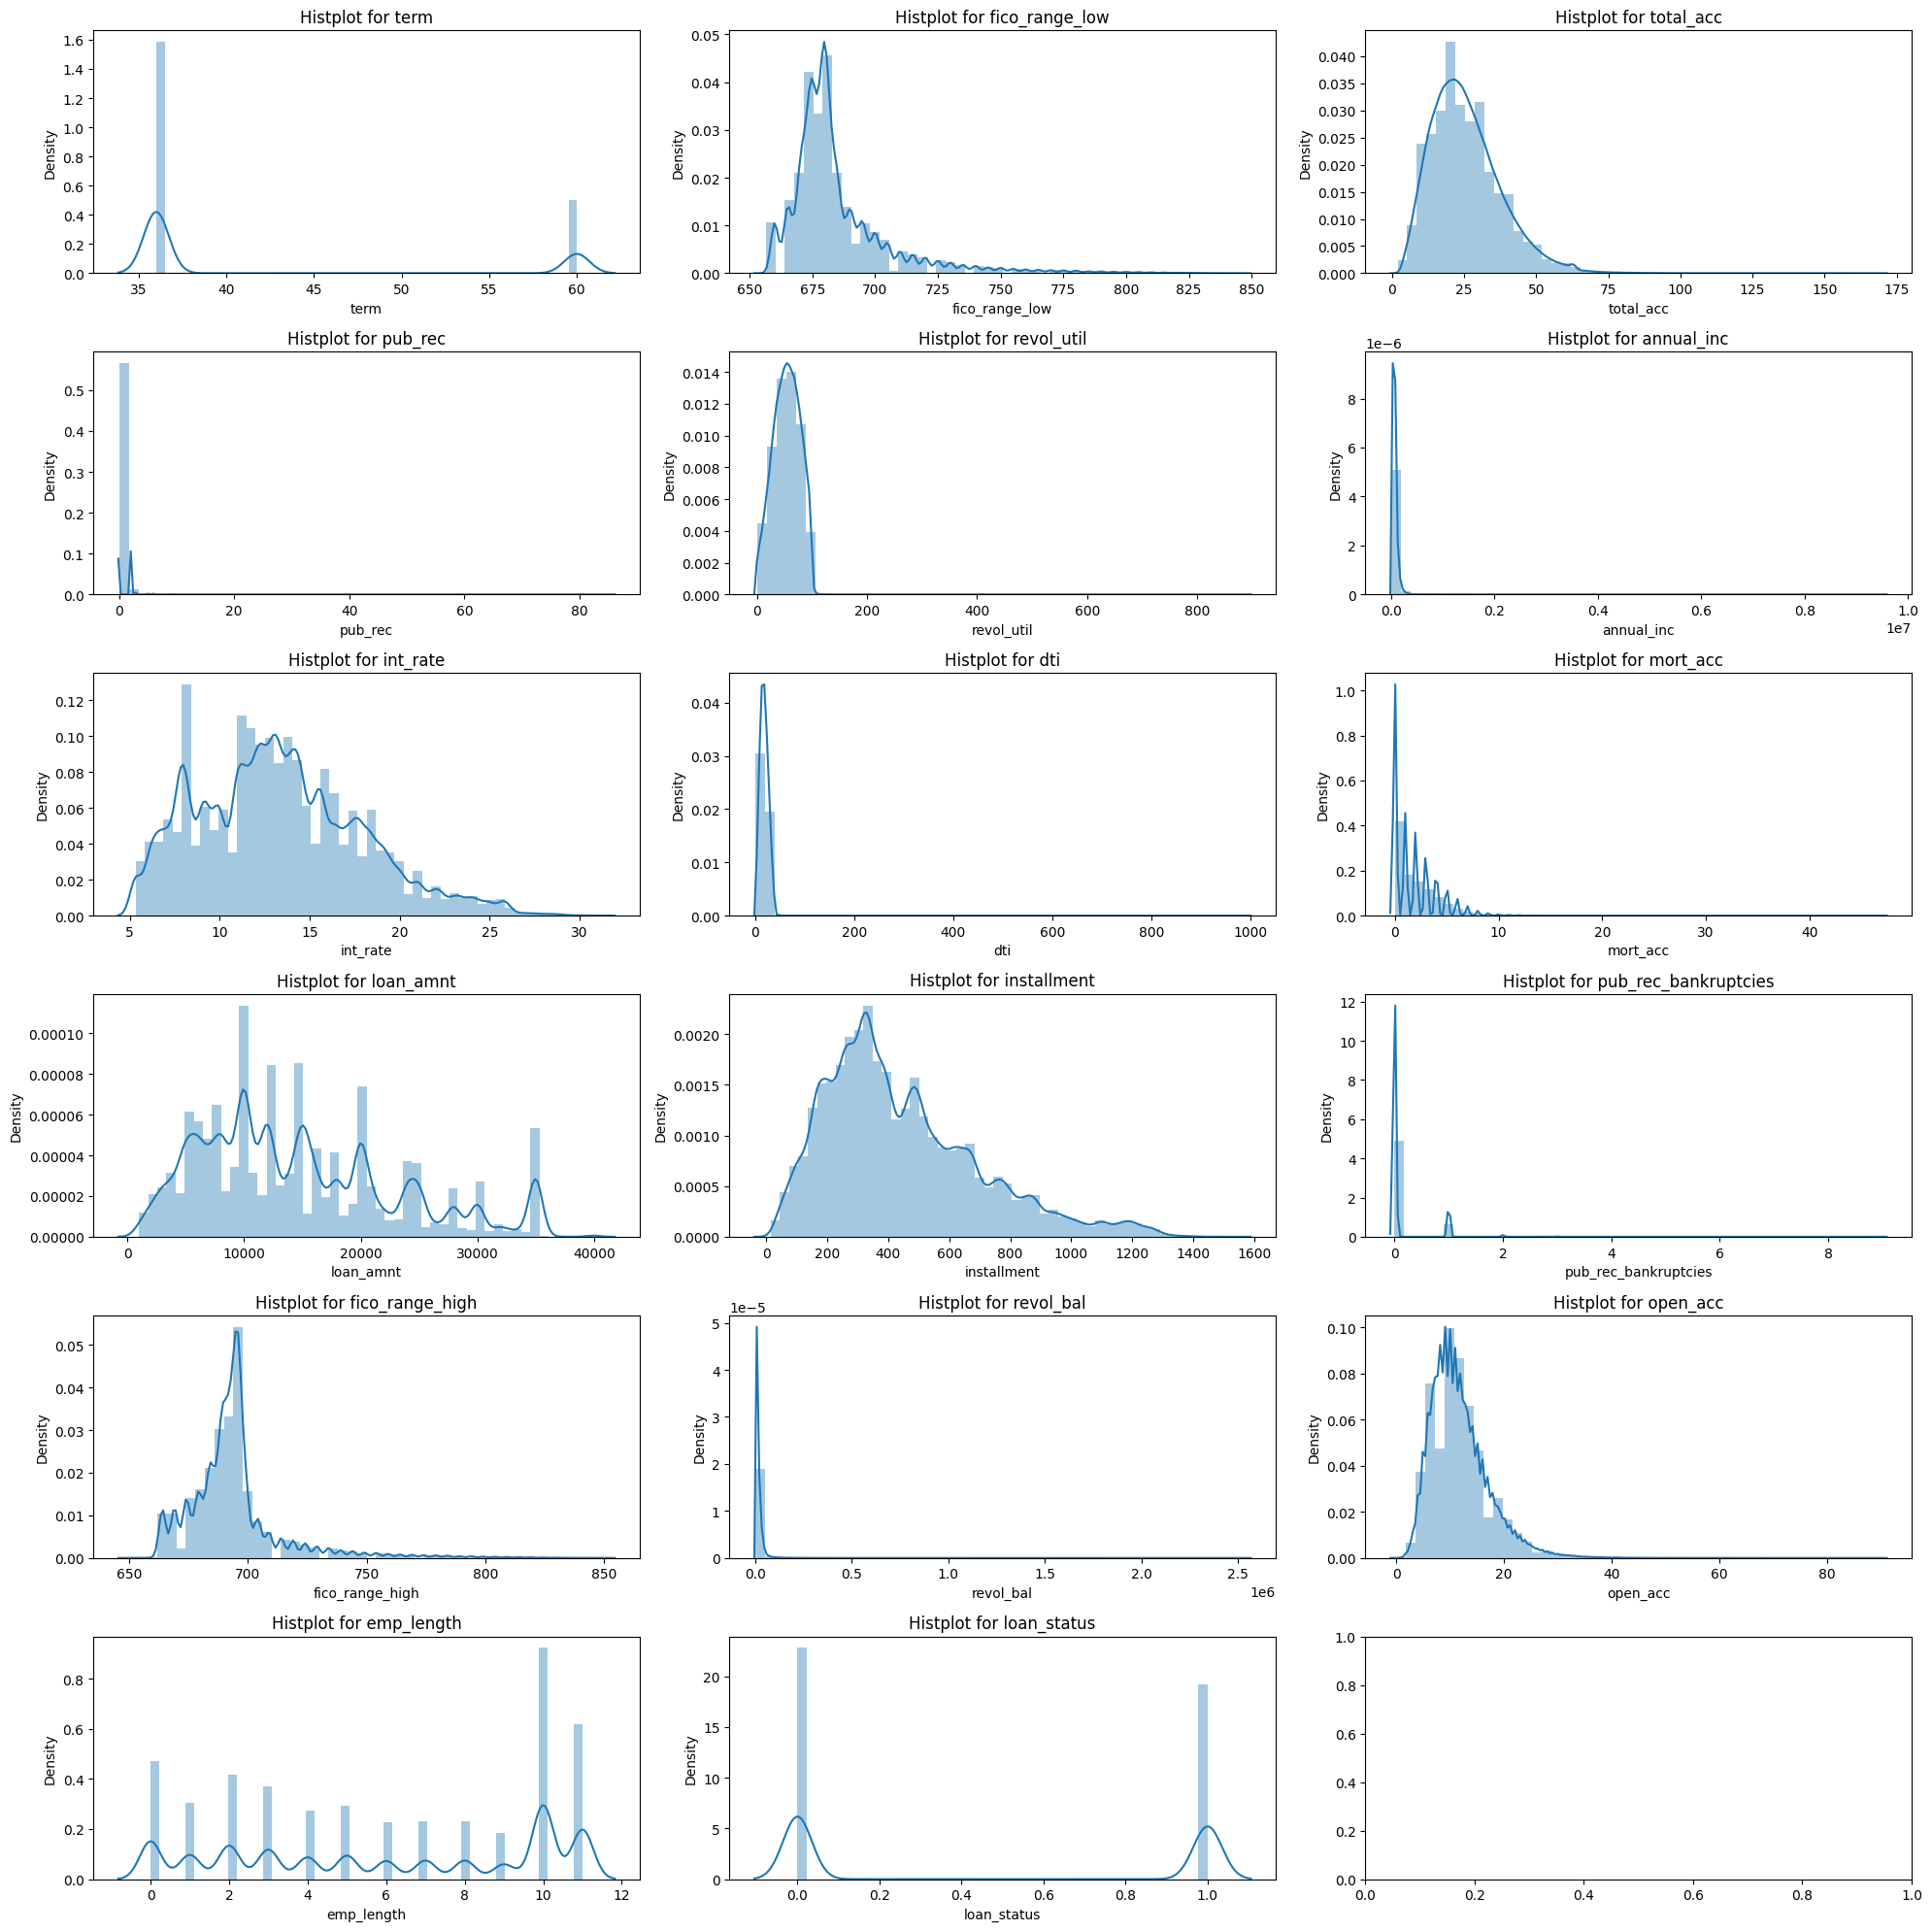

In [8]:
fig, ax = plt.subplots(6, 3, figsize=(20, 20))
ax = ax.flatten()

for i, column in enumerate(num_columns):
    sns.distplot(data[f"{column}"], ax=ax[i]);
    ax[i].set_title(f"Histplot for {column}")

plt.tight_layout()
plt.show()

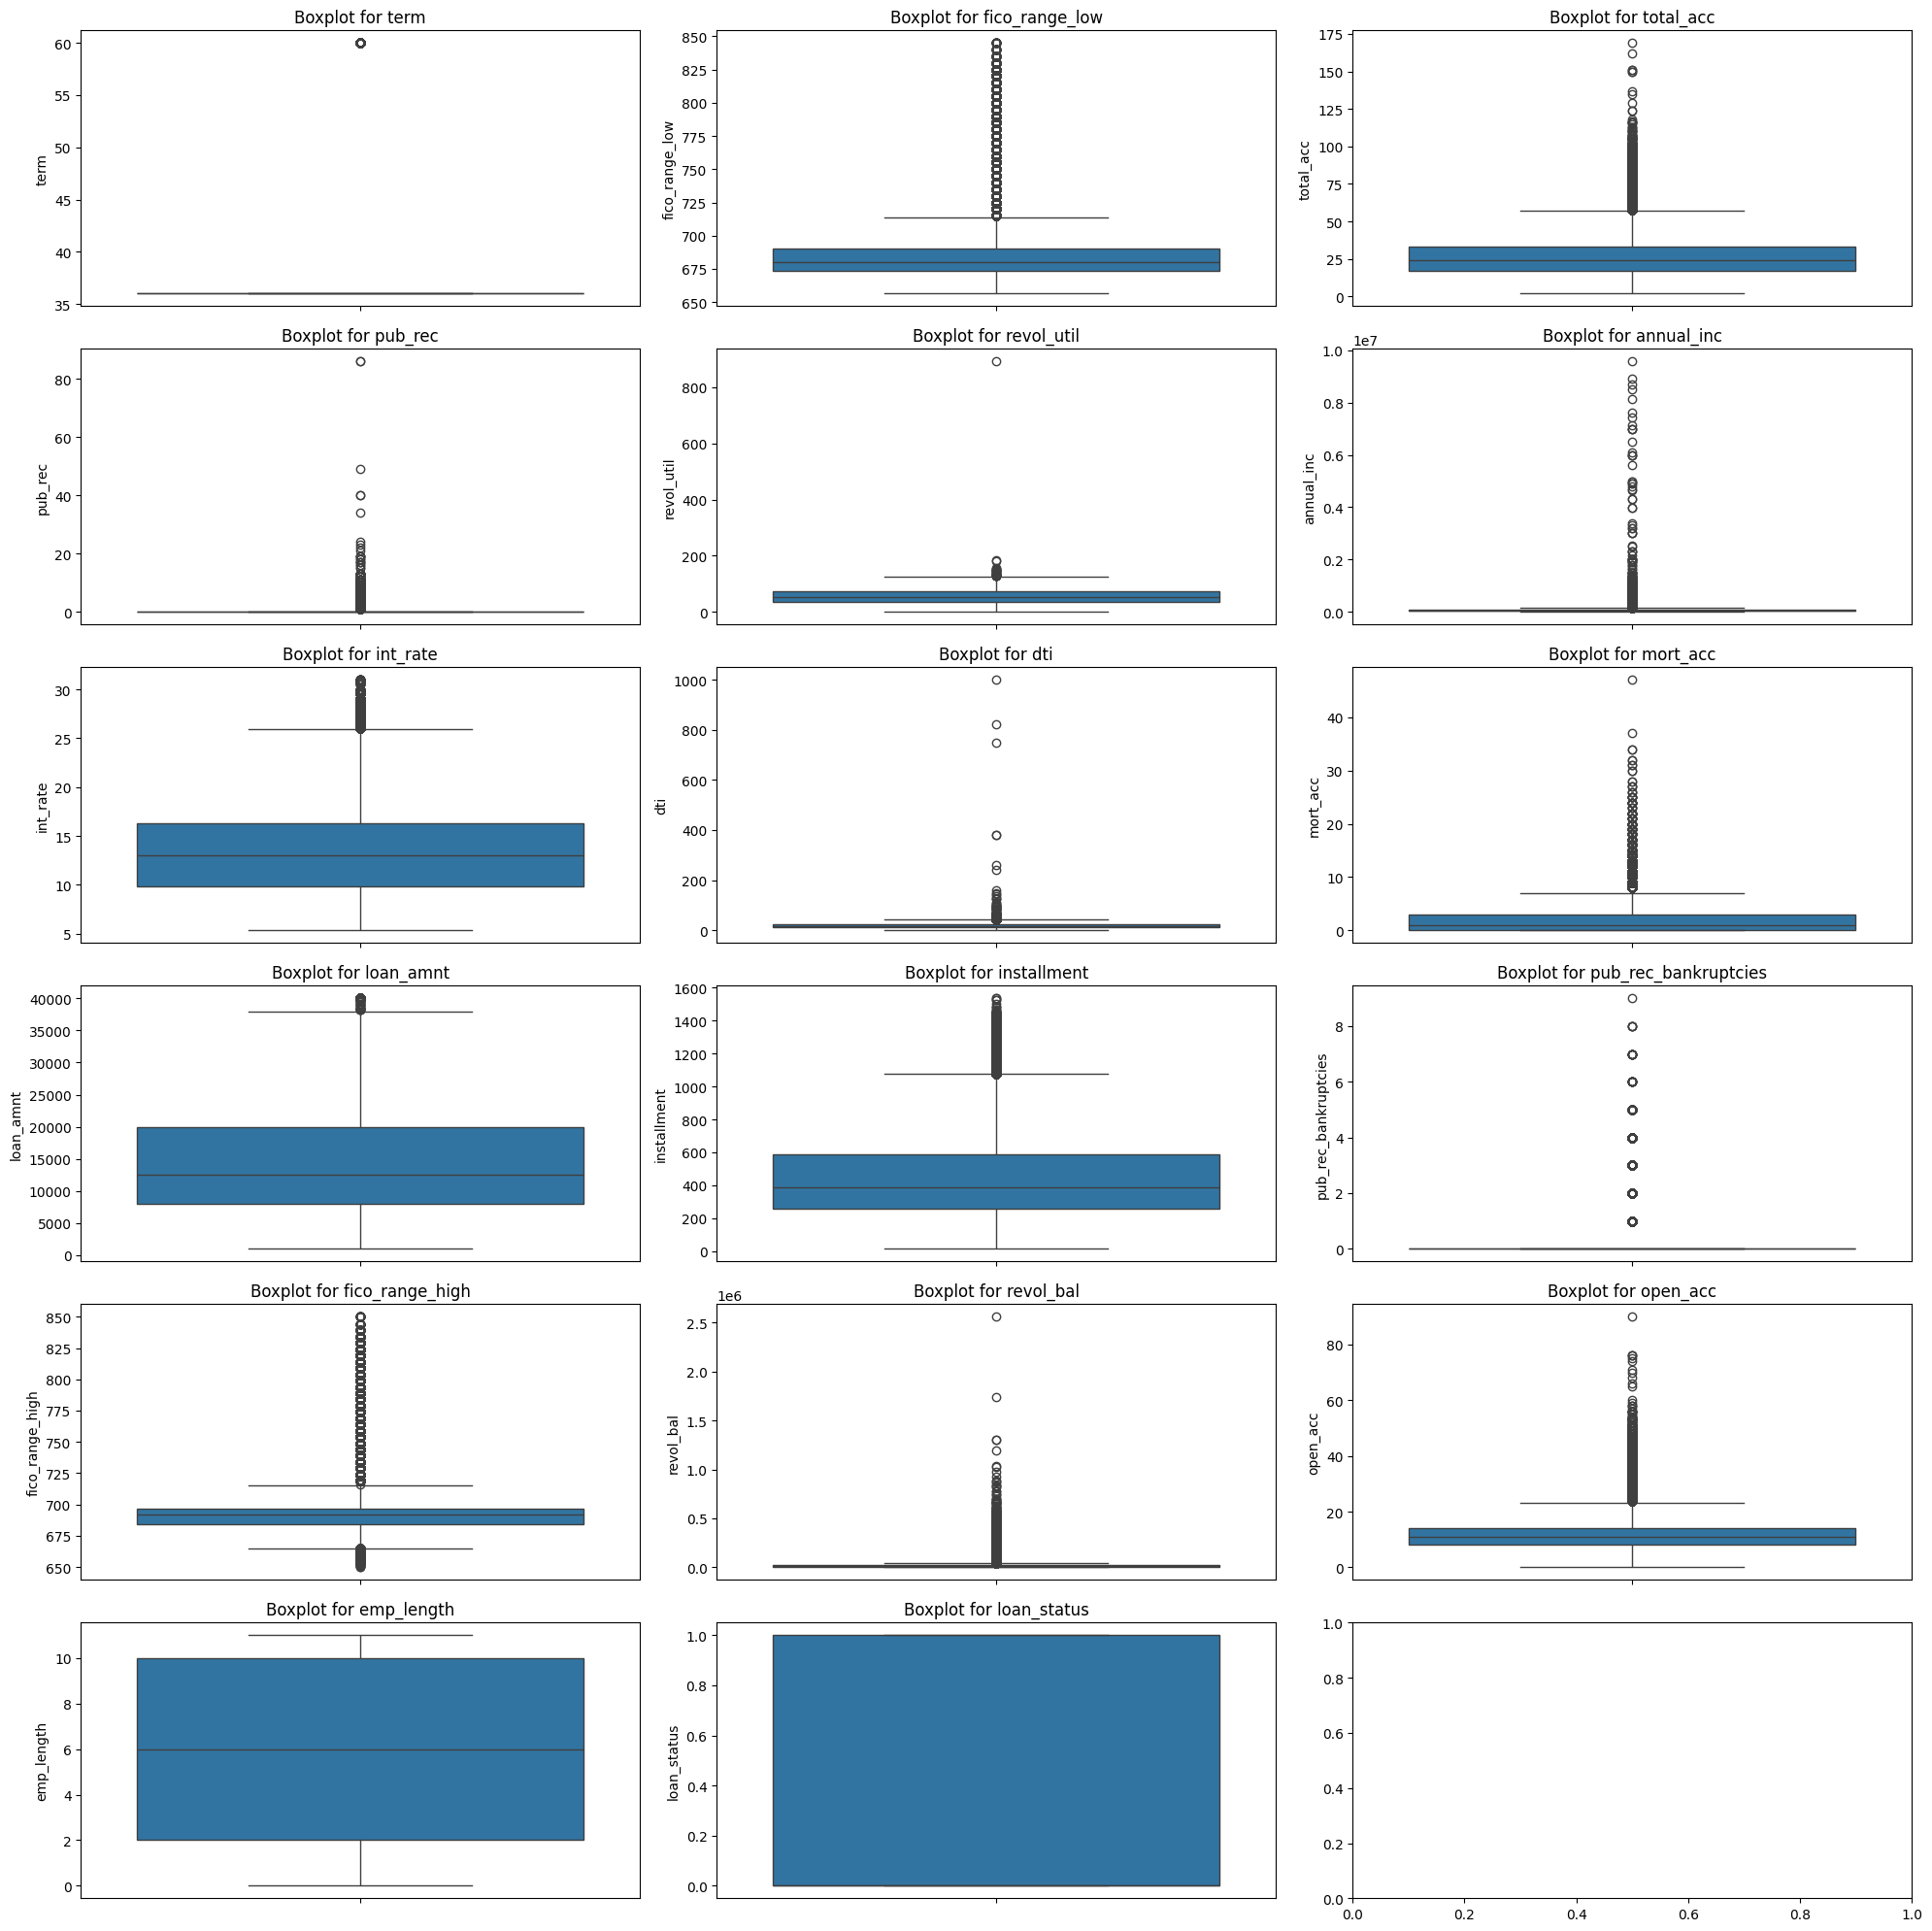

In [9]:
fig, ax = plt.subplots(6, 3, figsize=(20, 20))
ax = ax.flatten()

for i, column in enumerate(num_columns):
    sns.boxplot(data[f"{column}"], ax=ax[i]);
    ax[i].set_title(f"Boxplot for {column}")

plt.tight_layout()
plt.show()

In [10]:
pattern = r'\b\d{4}-\d{2}-\d{2}\b'
data["earliest_cr_line_dt"] = pd.to_datetime([re.findall(pattern, data["earliest_cr_line"][i])[0] for i in range(len(list(data["earliest_cr_line"])))], errors="coerce")

In [11]:
data["grade"] = [re.findall("[A-Z]", data["sub_grade"][i])[0] for i in range(len(list(data["sub_grade"])))]

In [12]:
data = data.drop(columns=["earliest_cr_line", "sub_grade"])

In [13]:
data["year_earliest_cr_line"] = data["earliest_cr_line_dt"].dt.year.astype("object")

In [14]:
cat_columns = [column for column in data.columns if data[column].dtype == "object"]

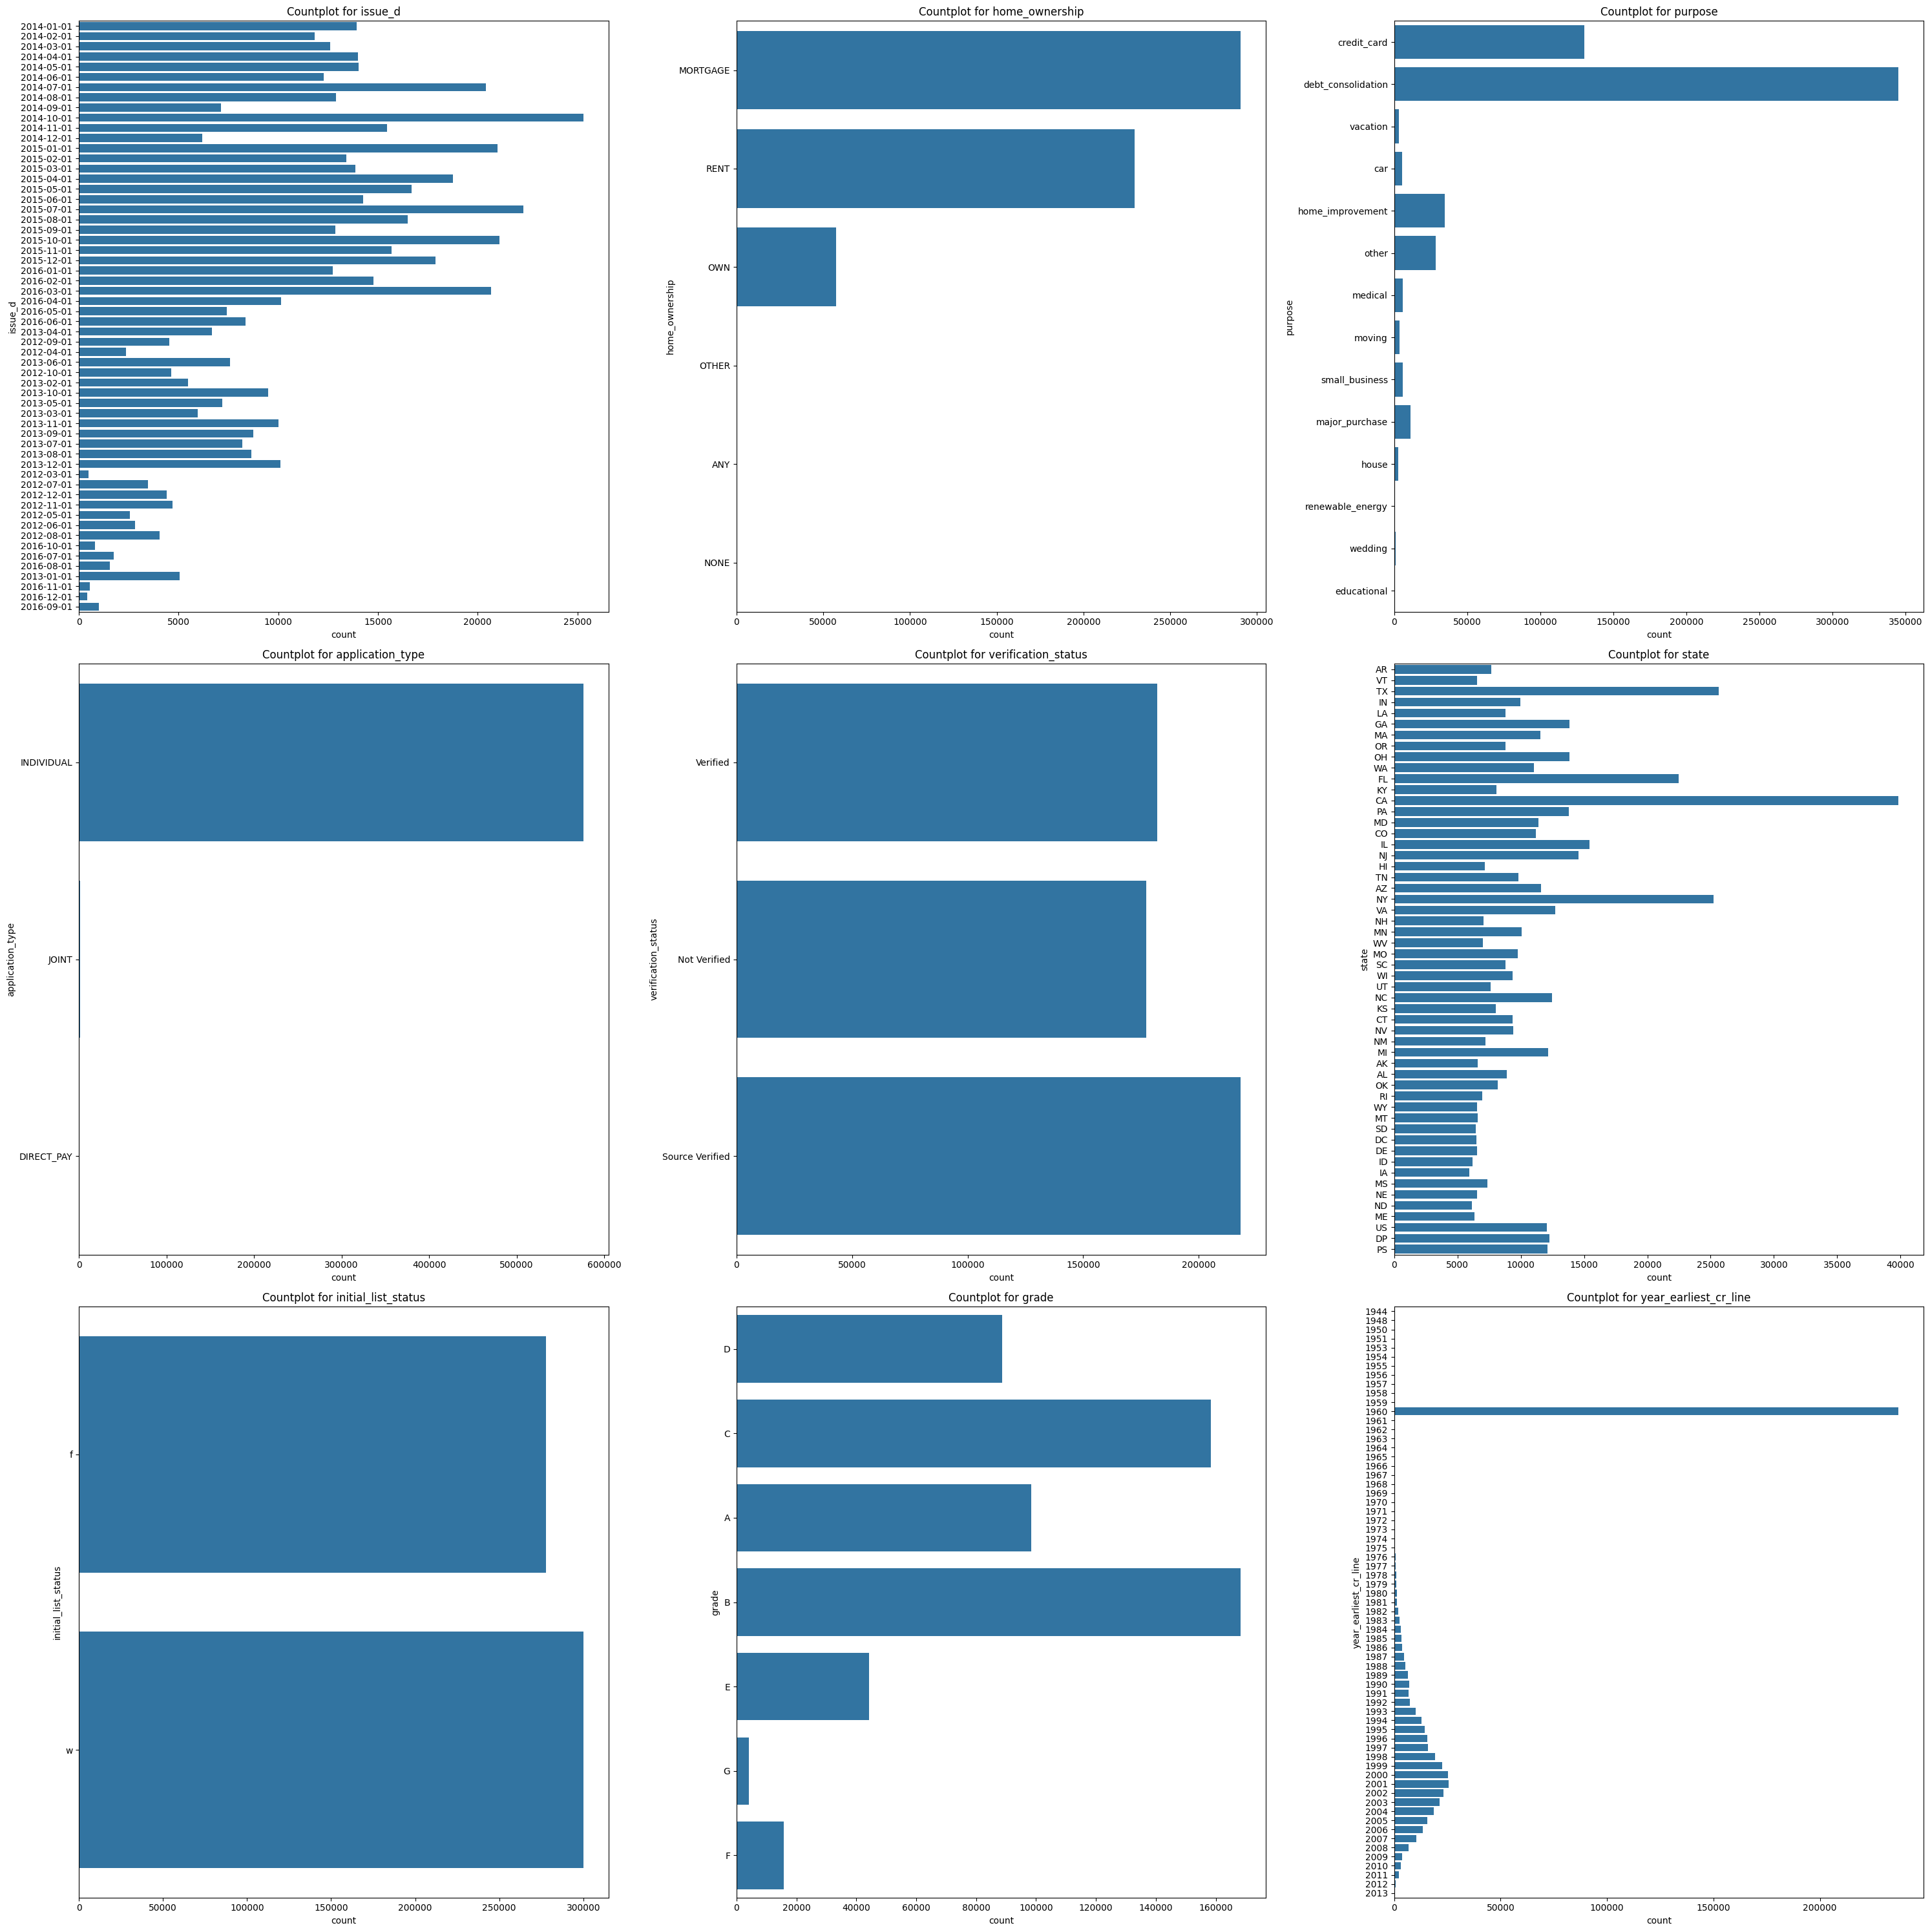

In [15]:
fig, ax = plt.subplots(3, 3, figsize=(30, 30))
ax = ax.flatten()

for i, column in enumerate(cat_columns):
    sns.countplot(data, y=column, ax=ax[i]);
    ax[i].set_title(f"Countplot for {column}")

plt.tight_layout()
plt.show()

### Data processing

In [16]:
data.columns

Index(['issue_d', 'term', 'home_ownership', 'fico_range_low', 'total_acc',
       'pub_rec', 'revol_util', 'annual_inc', 'int_rate', 'dti', 'purpose',
       'mort_acc', 'loan_amnt', 'application_type', 'installment',
       'verification_status', 'pub_rec_bankruptcies', 'state',
       'initial_list_status', 'fico_range_high', 'revol_bal', 'id', 'open_acc',
       'emp_length', 'loan_status', 'earliest_cr_line_dt', 'grade',
       'year_earliest_cr_line'],
      dtype='object')

In [17]:
column_to_robust_scale = ["fico_range_high", 'fico_range_low', "annual_inc", "revol_util", "total_acc", "open_acc", "mort_acc", "emp_length", "pub_rec_bankruptcies", "dti", "revol_bal", "pub_rec", "int_rate"]

In [18]:
robustScaler = RobustScaler()
data[column_to_robust_scale] = robustScaler.fit_transform(data[column_to_robust_scale])

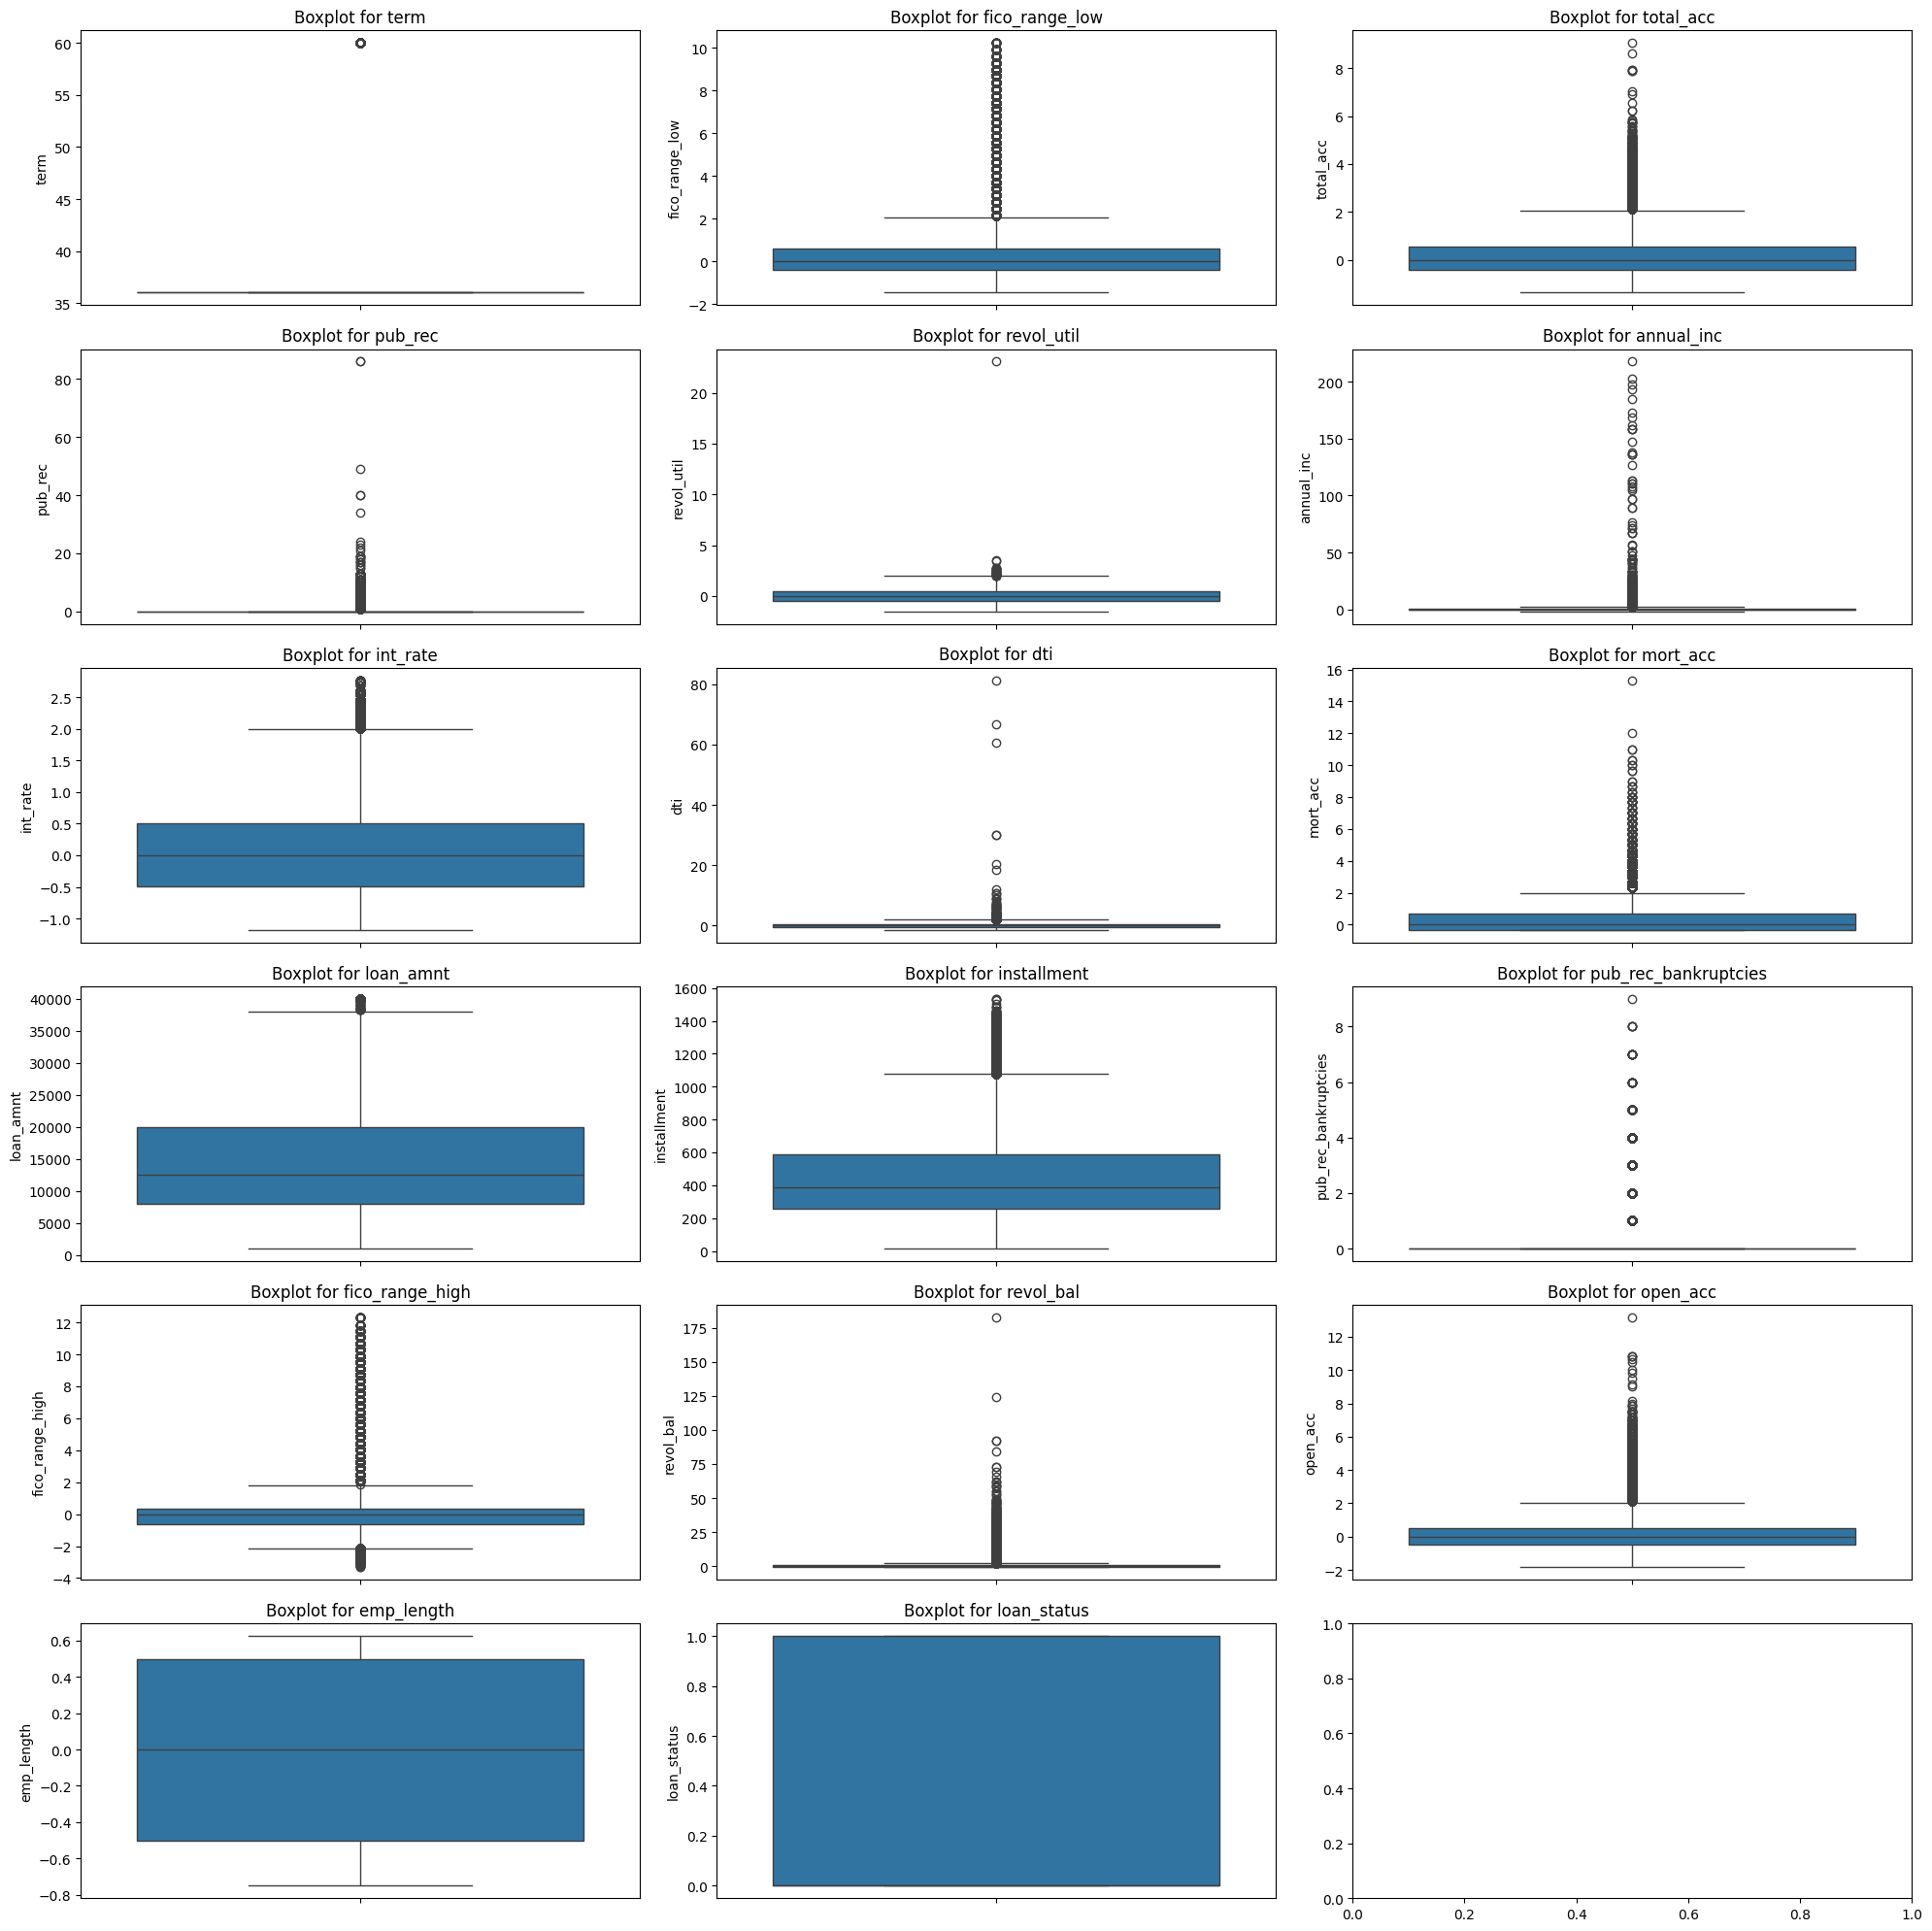

In [19]:
# Visualize again to see if we still have many outliers
fig, ax = plt.subplots(6, 3, figsize=(20, 20))
ax = ax.flatten()

for i, column in enumerate(num_columns):
    sns.boxplot(data[f"{column}"], ax=ax[i]);
    ax[i].set_title(f"Boxplot for {column}")

plt.tight_layout()
plt.show()


In [20]:
# Apply Quantile Transformation to force them follow a normal distribution 

column_to_transform = column_to_robust_scale 
transformer = QuantileTransformer(output_distribution='normal')
data_transformed = transformer.fit_transform(data[column_to_transform])

In [21]:
data[column_to_transform] = data_transformed

C:\Users\axelo\AppData\Local\Temp\ipykernel_18076\3169481866.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[f"{column}"], ax=ax[i]);
C:\Users\axelo\AppData\Local\Temp\ipykernel_18076\3169481866.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[f"{column}"], ax=ax[i]);
C:\Users\a

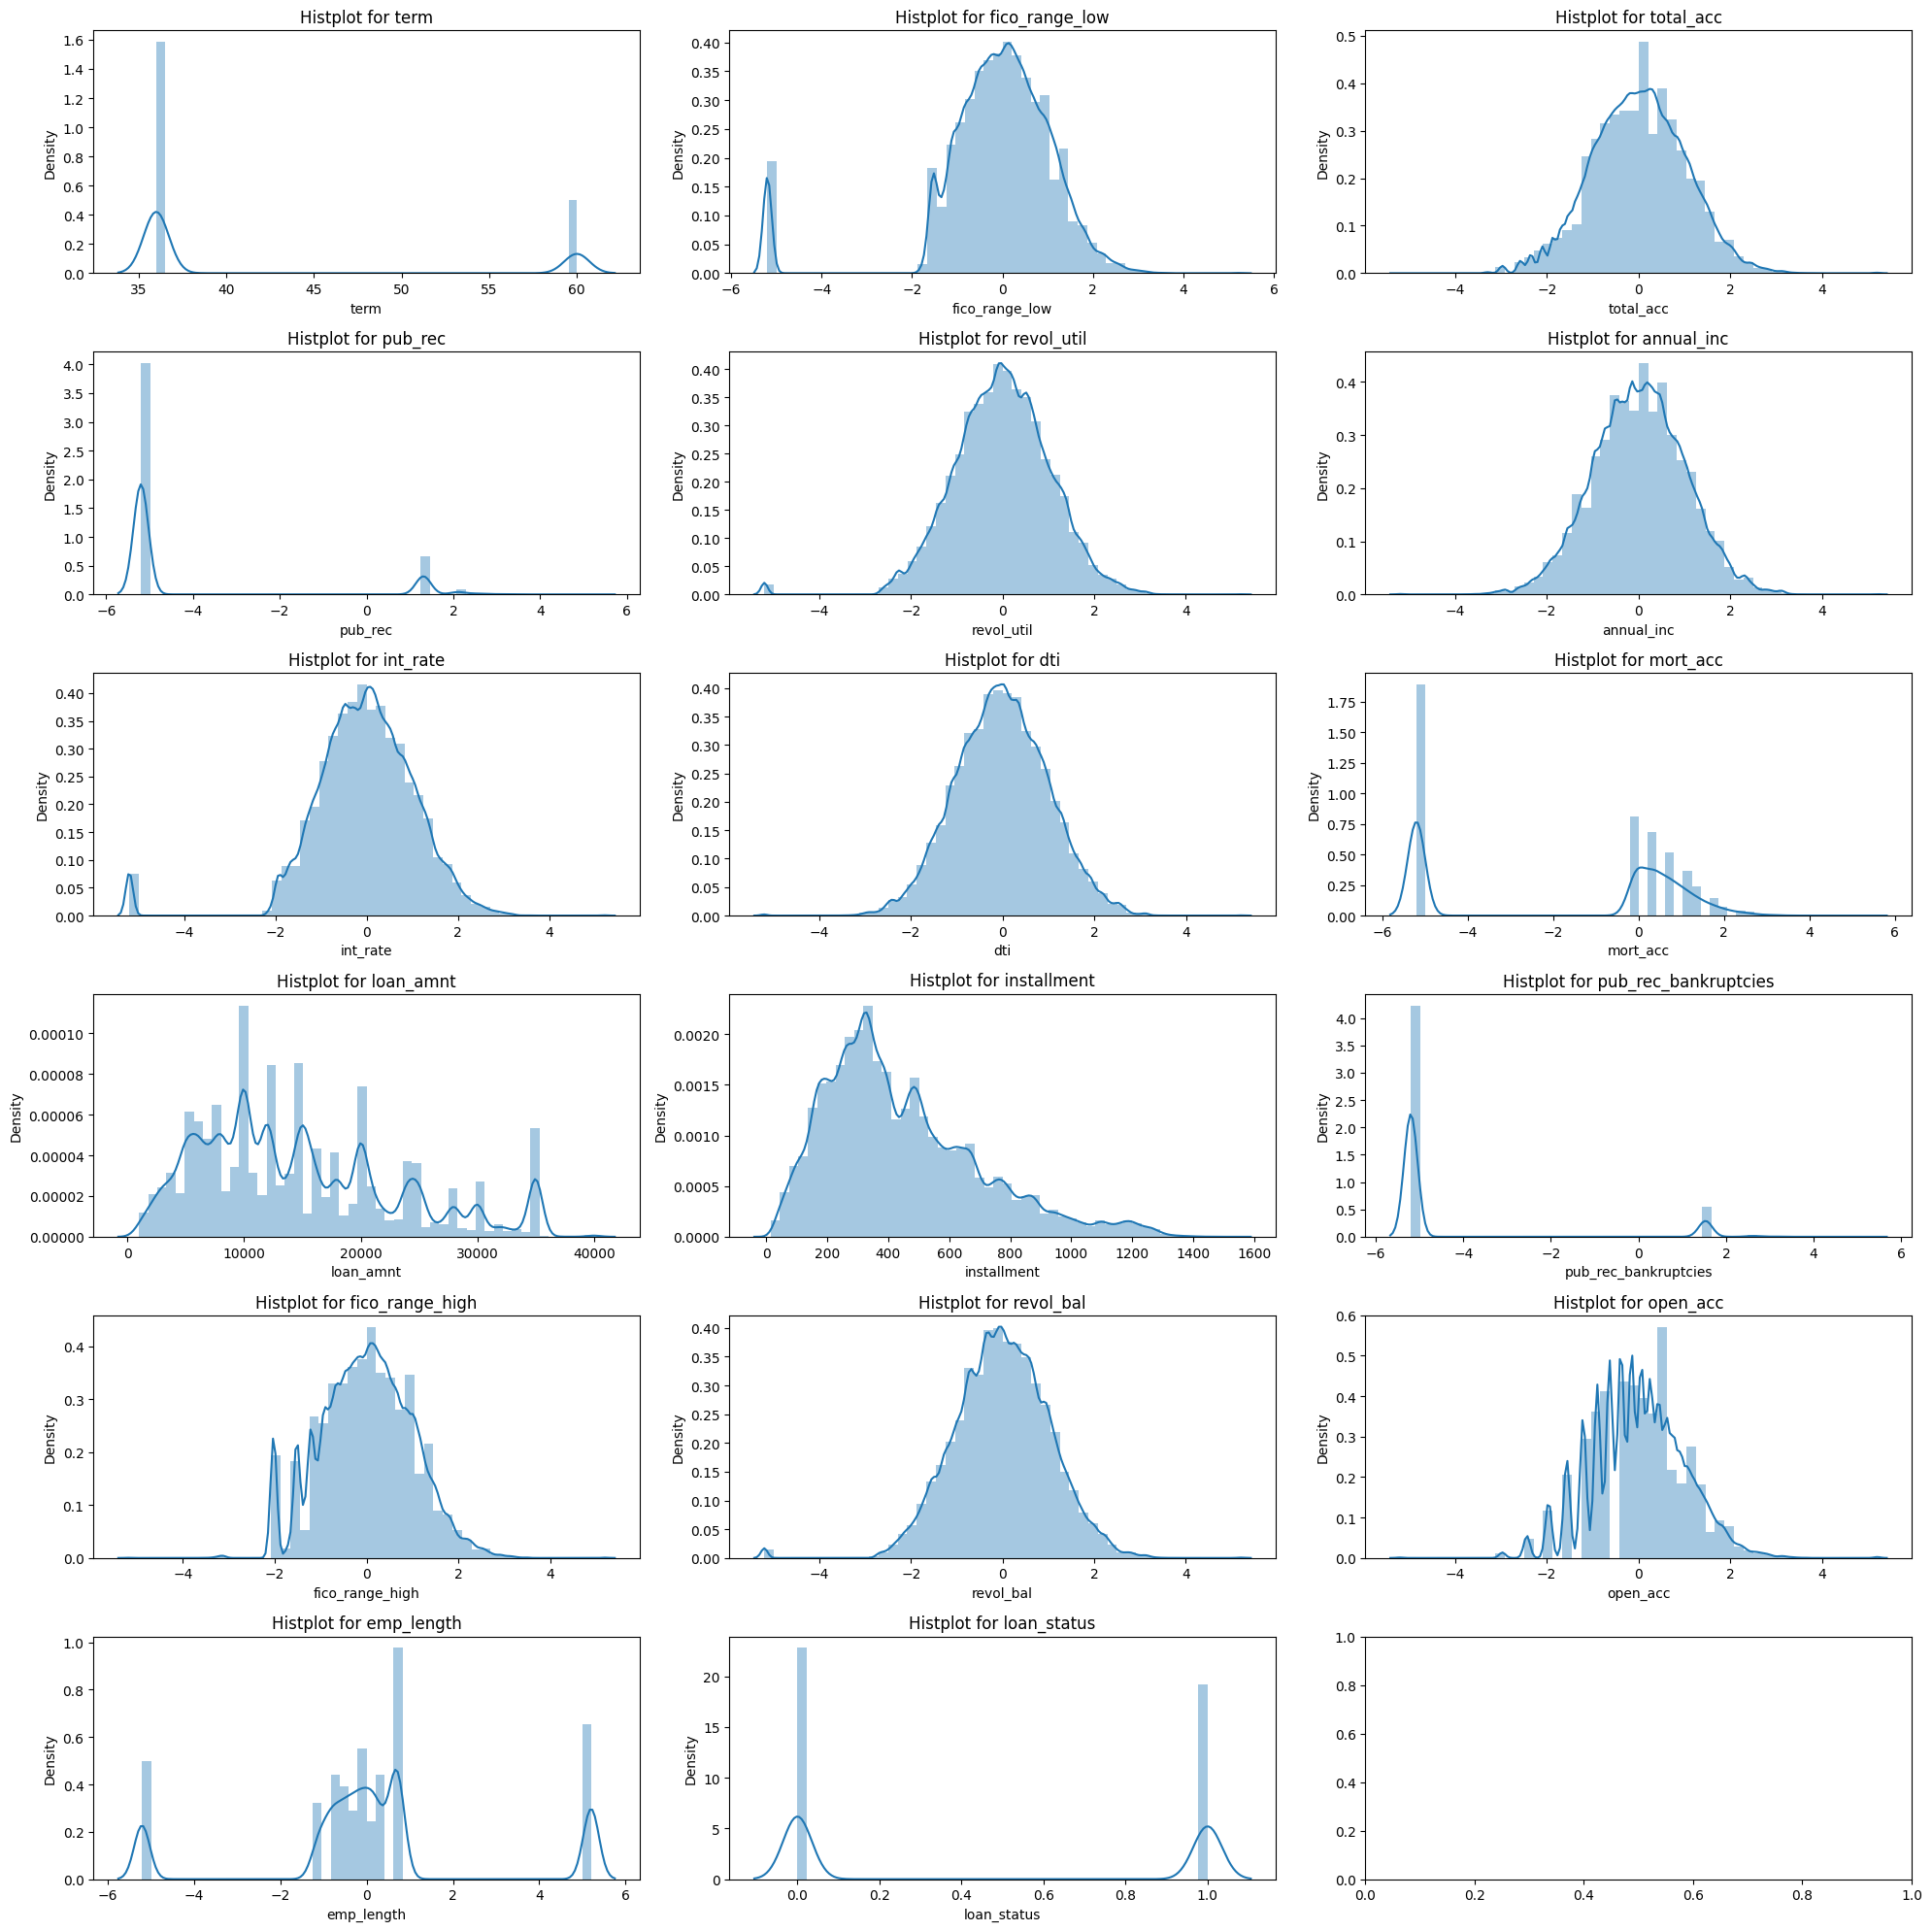

In [22]:
# Visualize again to see if we now have variables following normal distributions 

fig, ax = plt.subplots(6, 3, figsize=(20, 20))
ax = ax.flatten()

for i, column in enumerate(num_columns):
    sns.distplot(data[f"{column}"], ax=ax[i]);
    ax[i].set_title(f"Histplot for {column}")

plt.tight_layout()
plt.show()

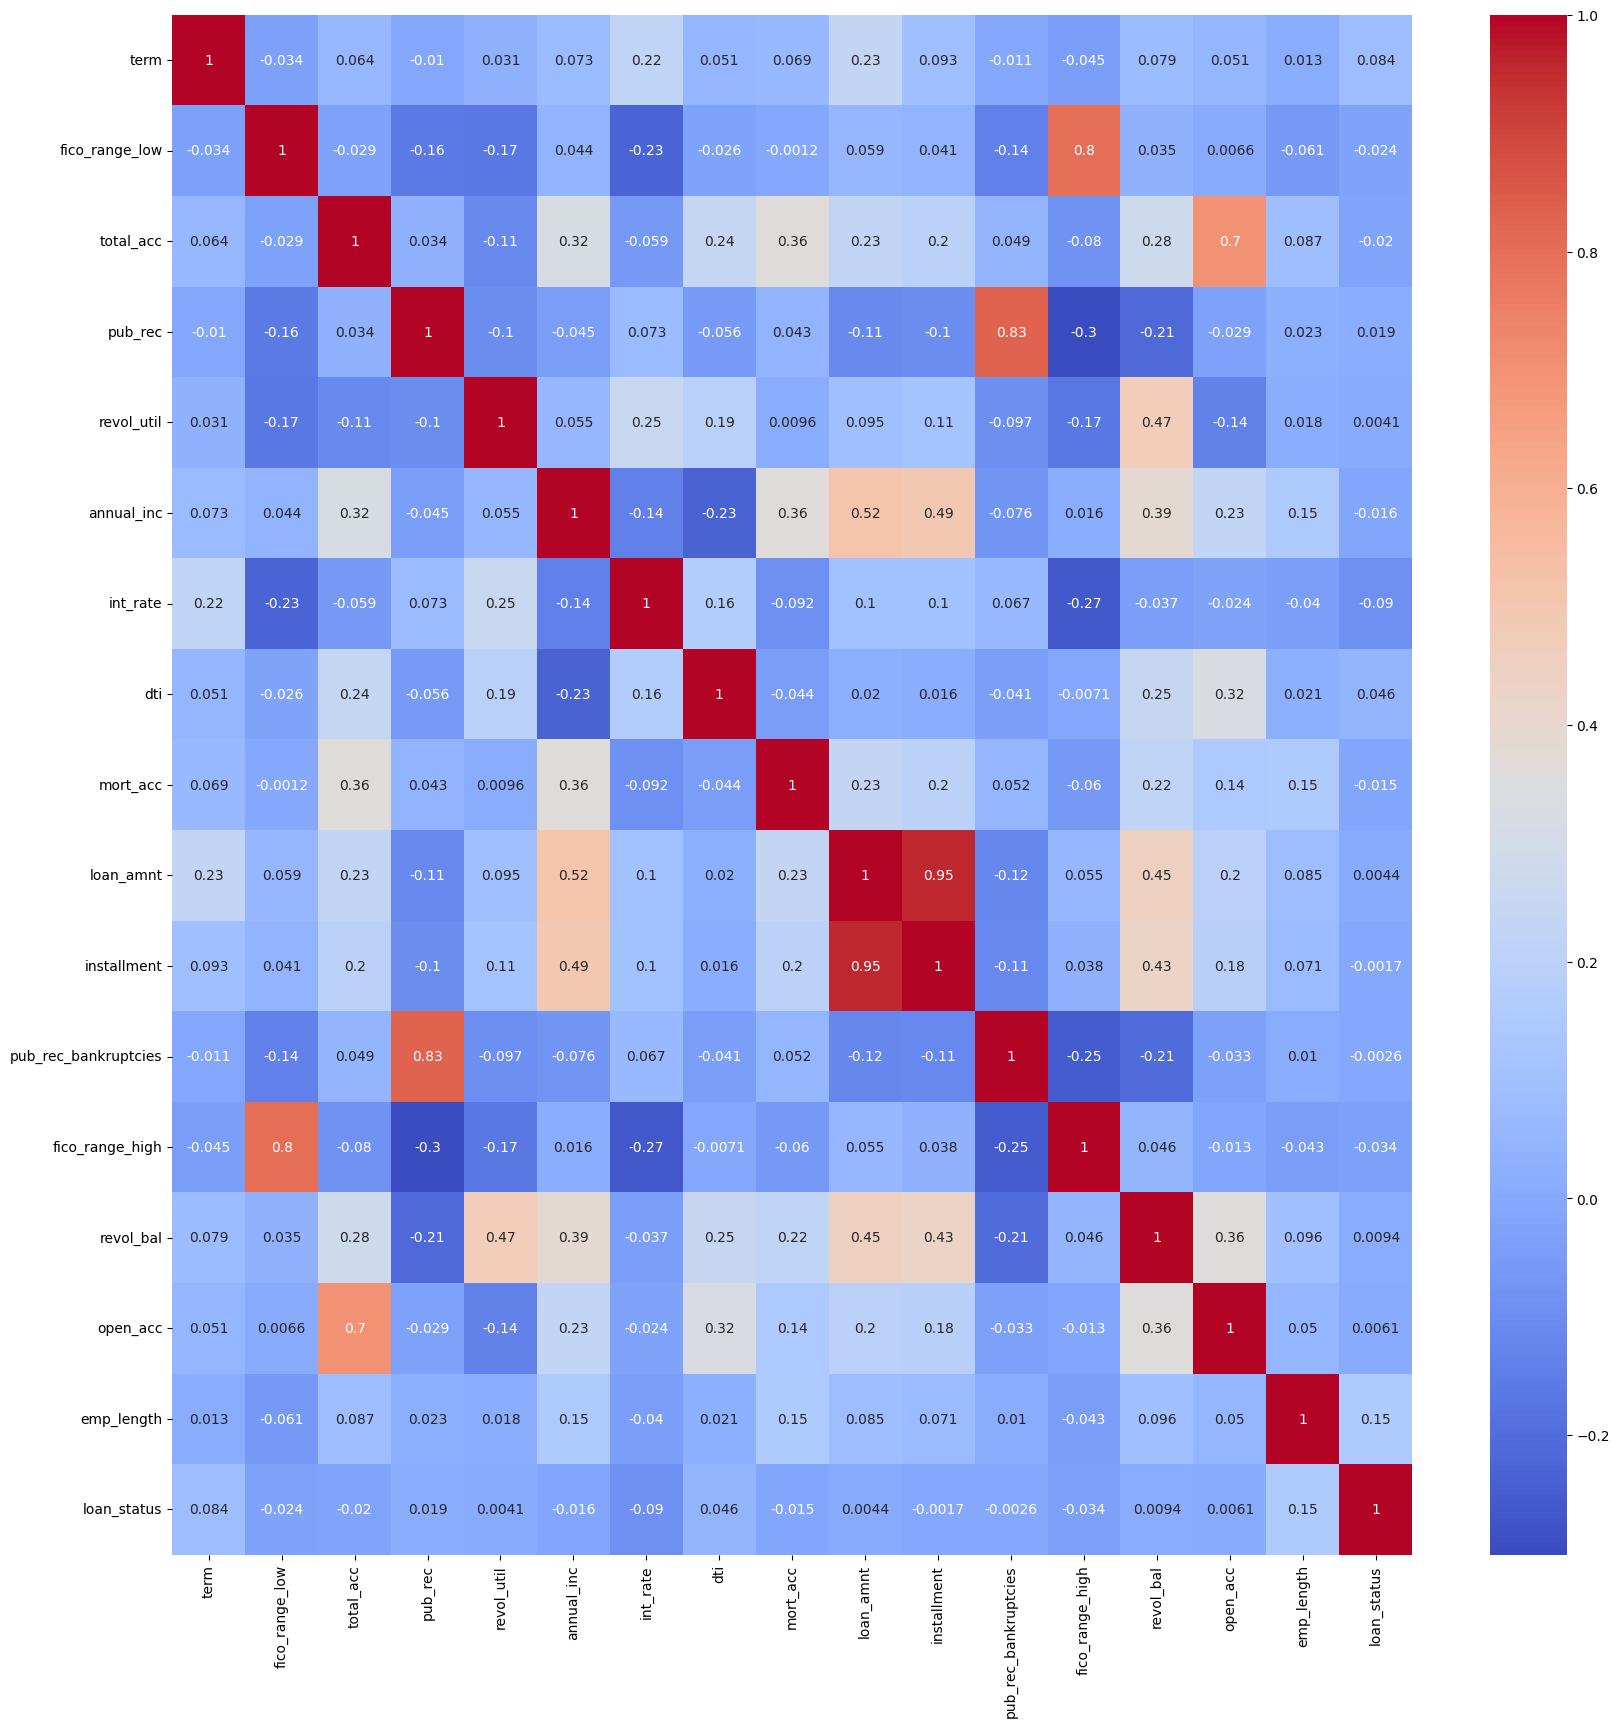

In [23]:
# Correlation between variables and potentials interesting target variables for feature selection
correlation_matrix = data[num_columns].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [24]:
# pub_rec and pub_rec_bankruptcies are highly correlated. We will only keep one of them
# open_acc and total_acc are also hihly correlated, we'll keep only total_acc
# Same for fico_range_low and fico_range_high, we will keep only fico_range_low

In [25]:
# installement and loan_amnt are not really correlated to other variables so they are interesting to be potential target variables because using variables not higly correlated togeher help seeing patterns 
# that are not obvious at first glance, it's insighful
# They are highly correlated between us, there is not need to predict both because they content redundant information. 

In [26]:
# Handling data types

data["term"] = data["term"].apply(lambda x: "3 ans" if x == 36. else "5 ans")

In [27]:
# Handling Imabalance between categorial data

ros = RandomOverSampler()
rus = RandomUnderSampler()

In [28]:
data_test = data.copy()

X_copy = data_test.drop(columns=["loan_status"])
y_copy = data_test["loan_status"]

In [29]:
X_resampled, y_resampled = rus.fit_resample(X_copy, y_copy)
X_resampled, y_resampled = ros.fit_resample(X_resampled, y_resampled)

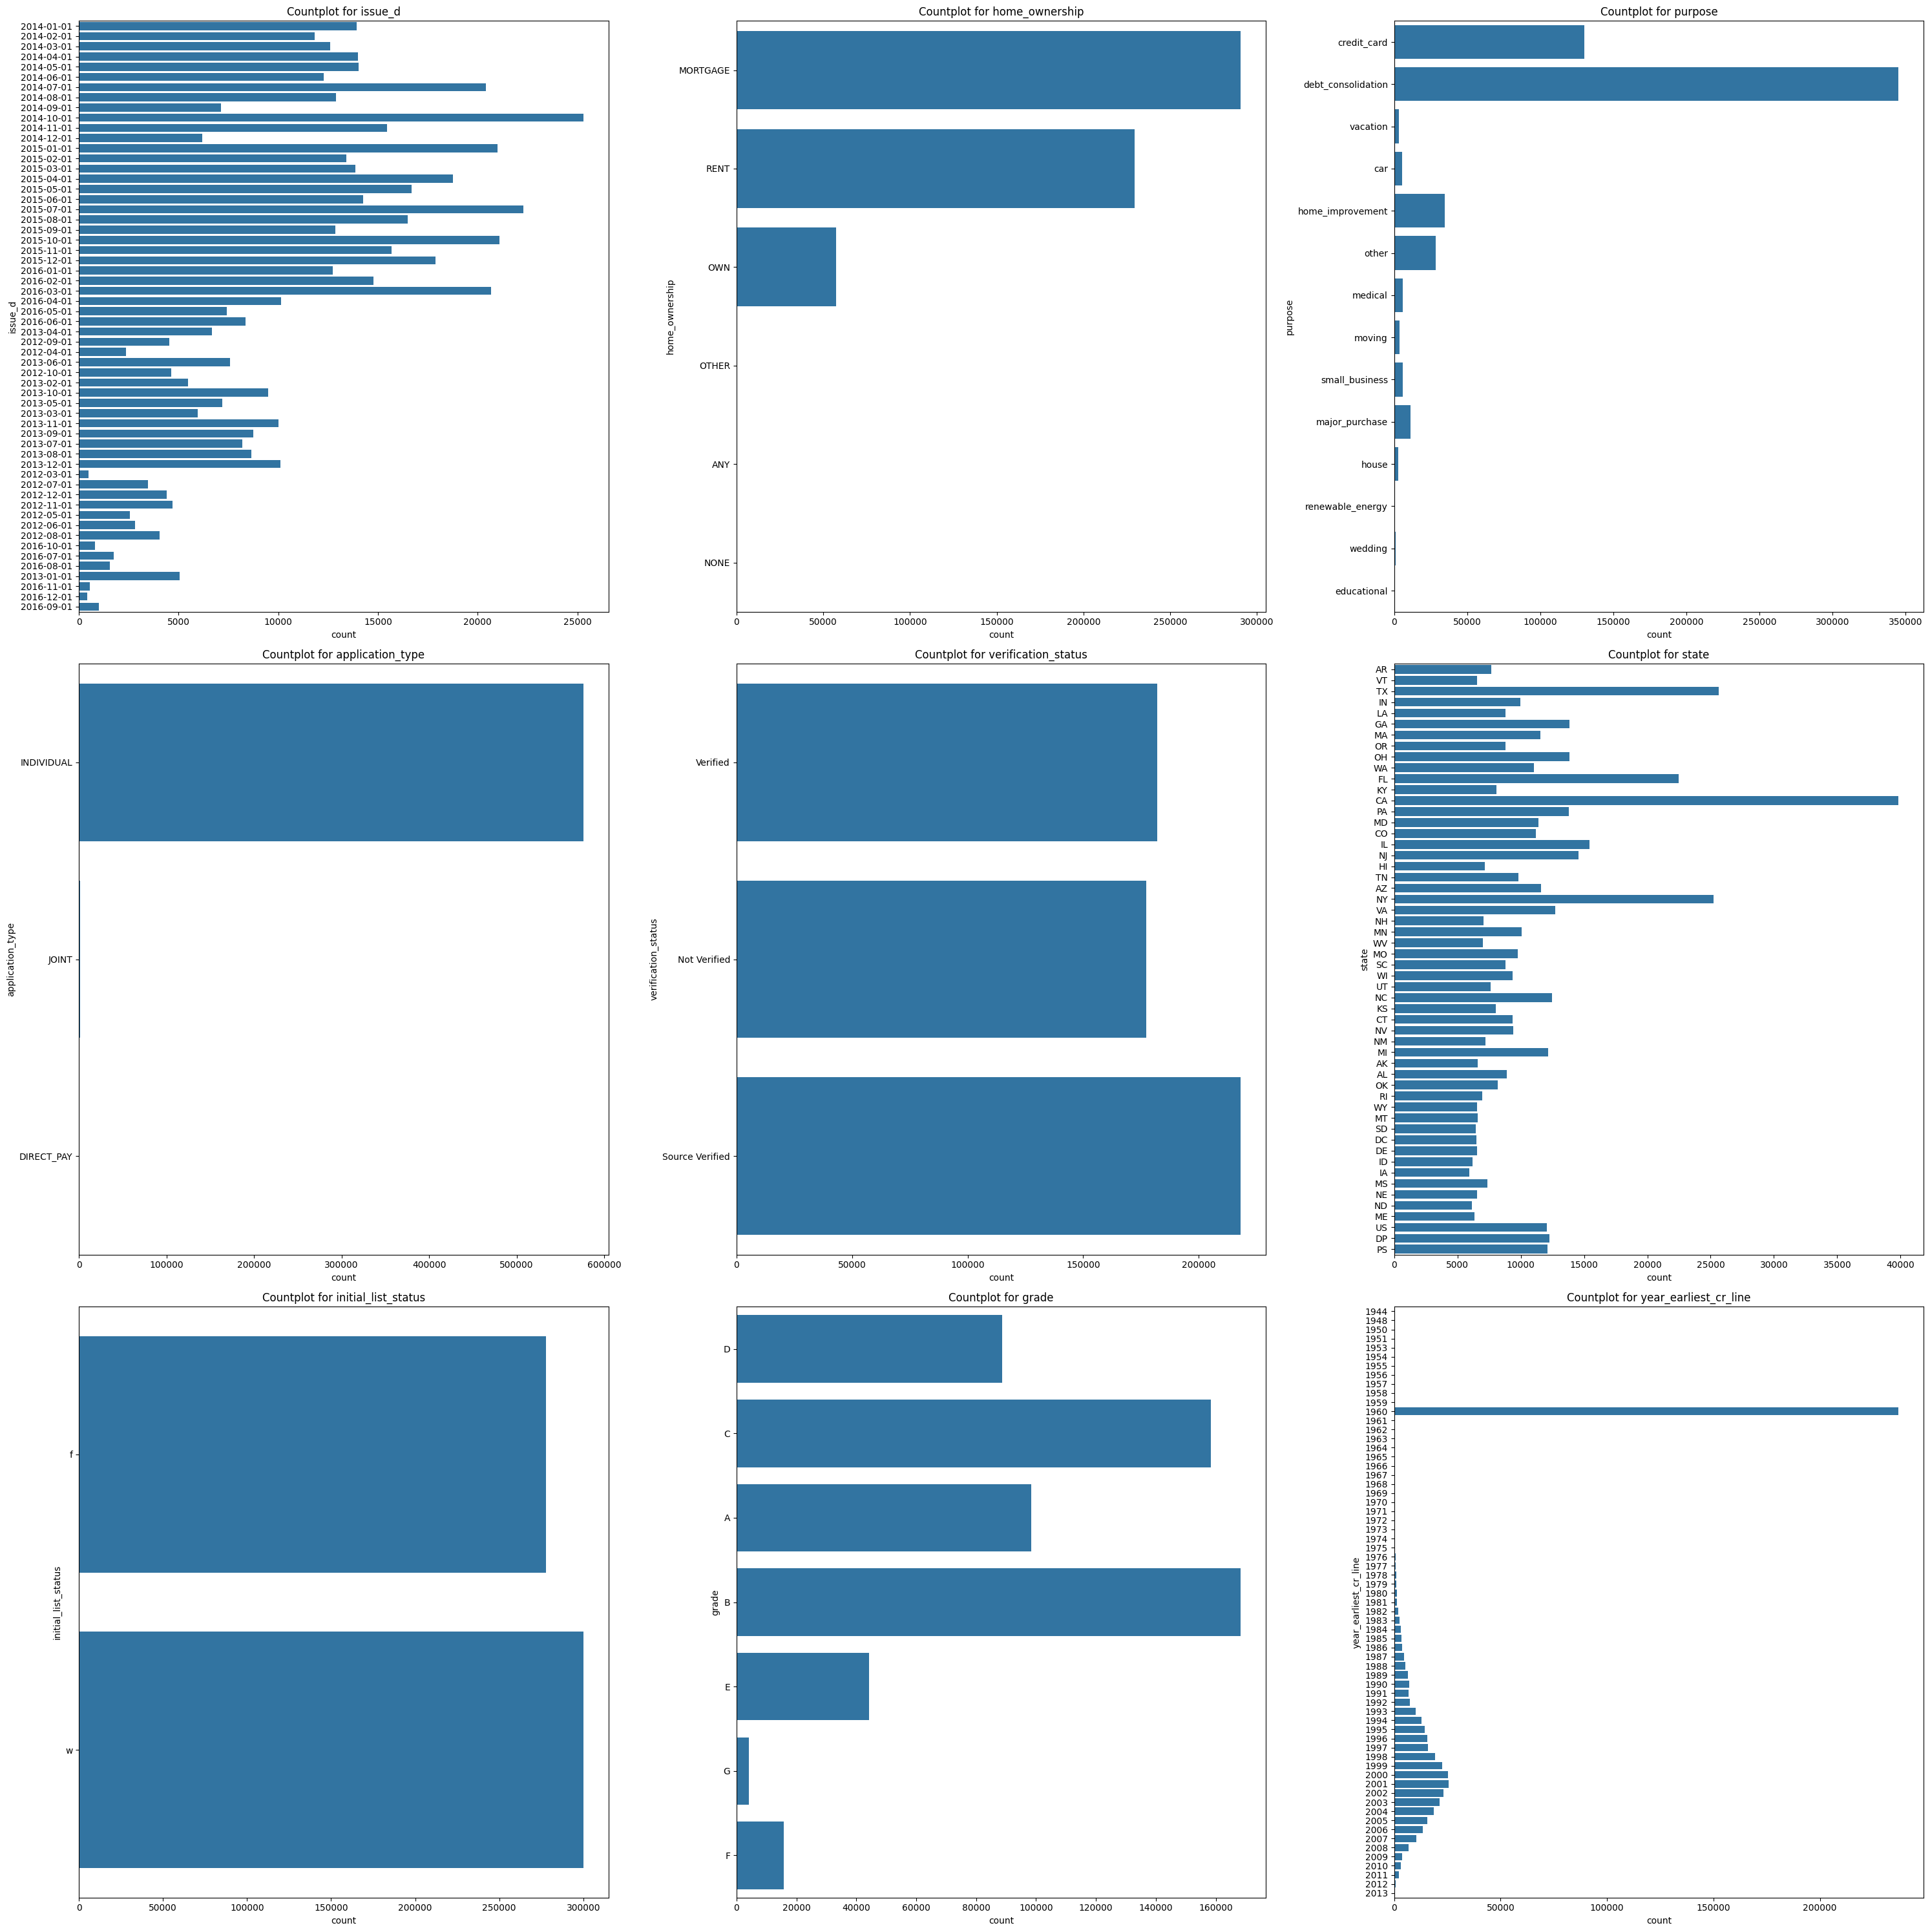

In [30]:
fig, ax = plt.subplots(3, 3, figsize=(30, 30))
ax = ax.flatten()

for i, column in enumerate(cat_columns):
    sns.countplot(data, y=column, ax=ax[i]);
    ax[i].set_title(f"Countplot for {column}")

plt.tight_layout()
plt.show()

### Modeling

#### Classification task

In [92]:
# Target variable is going to be : loan_status

In [93]:
# Feature selection
features_1 = ["grade", "emp_length", "home_ownership", "annual_inc", "verification_status", "dti"] #  borrower credit worthness
features_2 = ["loan_amnt", "term", "int_rate", "installment"] # loan details
features_3 = ["earliest_cr_line_dt", "open_acc", "revol_bal", "revol_util", "total_acc", "pub_rec", "pub_rec_bankruptcies"] # credit history

features_for_classification = features_1 + features_2 + features_3

In [94]:
X_classification = data[features_for_classification]
y_classification = data["loan_status"]

In [95]:
# One hot Encoding

X_classification = pd.get_dummies(data[features_for_classification], columns=["grade", "home_ownership", "verification_status", "term"])

In [96]:
# Datetime handling

X_classification['year_earliest_cr_line'] = X_classification['earliest_cr_line_dt'].dt.year
X_classification['month_earliest_cr_line_'] = X_classification['earliest_cr_line_dt'].dt.month
X_classification['day_earliest_cr_line_'] = X_classification['earliest_cr_line_dt'].dt.day
X_classification = X_classification.drop(columns=["earliest_cr_line_dt"])

In [97]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, test_size=0.20, random_state=42)

In [98]:
def get_classifiers():
    
    lr = LogisticRegression()
    dc = DecisionTreeClassifier()
    rc = RandomForestClassifier()
    knc = KNeighborsClassifier()
    gnb = GaussianNB()
    mnb = MultinomialNB()
    gbc = GradientBoostingClassifier()
    xgbc = XGBClassifier()
    lgbmc = LGBMClassifier()
    

    classifiers = {"Logistic Regressor": lr, "Decision Tree Classifier": dc, "Random Forest Classifier": rc, "K-Neirest Neighbors Classifier": knc,
                   "Gaussian Naive Bayes": gnb, "Gradient Boosting Classifier": gbc,
                   "XG Boost Classifier": xgbc, "LGBM Classifier": lgbmc}
    
    return classifiers

In [99]:
def train_model_categorical(X_train, X_test, y_train, y_test, models : dict):    
    acc_dict = {}

    for model_name in models.keys():
        models[model_name].fit(X_train, y_train)
        score = models[model_name].score(X_test, y_test)
        print(f"Score for {model_name} : {score}")
        acc_dict[models[model_name]] = score
    
    #max_acc = max(list(acc_dict.values()))
    
    #for model, acc in list(acc_dict.items()):
    #    if acc ==  max_acc:
    #        saved_model =  model
    
    return acc_dict

In [118]:
# Modeling
accuracy_data = train_model_categorical(X_train, X_test, y_train, y_test, models=get_classifiers())

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Score for Logistic Regressor : 0.8079463319627787
Score for Decision Tree Classifier : 0.73127028781649
Score for Random Forest Classifier : 0.8220991127461589
Score for K-Neirest Neighbors Classifier : 0.7929971867561134
Score for Gaussian Naive Bayes : 0.8130188270937027
Score for Gradient Boosting Classifier : 0.8214585587535166
Score for XG Boost Classifier : 0.8236312486474789
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 211470, number of negative: 250626
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2085
[LightGBM] [Info] Number of data points in the train set: 462096, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.457632 -> initscore=-0.169879
[LightGBM] [Info] Start trai

In [119]:
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]
metrics_data = {}
metrics_data["Metric"] = metrics
model_names = list(get_classifiers().keys())

for model_name, model in zip(model_names, list(accuracy_data.keys())):
    y_pred = model.predict(X_test)
    y_true = y_test
    metrics_data[model_name] = [accuracy_score(y_true, y_pred), precision_score(y_true, y_pred), recall_score(y_true, y_pred), f1_score(y_true, y_pred), roc_auc_score(y_true, y_pred)]

In [120]:
# Visualizations
df_metrics = pd.DataFrame(metrics_data)
fig = go.Figure()

for model in df_metrics.columns[1:]:
    fig.add_trace(go.Scatterpolar(
        r=df_metrics[model],
        theta=df_metrics['Metric'],
        fill='toself',
        name=model
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1])
    ),
    title="Model Metrics Comparison",
    showlegend=True
)
fig.show()


In [126]:
fig = px.bar(
    df_metrics.melt(id_vars='Metric', var_name='Model', value_name='Score'),
    x='Metric',
    y='Score',
    color='Model',
    barmode='group',
    title='Model Performance by Metric'
)

fig.update_layout(
    xaxis_title="Metrics",
    yaxis_title="Score",
    legend_title="Models"
)
fig.show()
fig.write_html("bar_chart.html")

In [127]:
fig = px.line(
    df_metrics.melt(id_vars='Metric', var_name='Model', value_name='Score'),
    x='Metric',
    y='Score',
    color='Model',
    title='Model Metrics Trend'
)

fig.update_layout(
    xaxis_title="Metrics",
    yaxis_title="Score",
    legend_title="Models"
)
fig.show()
fig.write_html("line_chart.html")

In [128]:
df_metrics = pd.DataFrame(metrics_data)

metrics_table = df_metrics.to_html(classes="table table-striped", index=False)

with open("metrics_table.html", "w") as file:
    file.write(metrics_table)

#### Regression task 

In [139]:
# Target variables are going to be loan_amnt, installment

In [65]:
# feature selection

features_1 = ["annual_inc", "emp_length", "dti"] #  Borrower Demographics and Financial Health
features_2 = ["grade", "revol_bal", "revol_util", "total_acc", "pub_rec"] # Loan and Credit Details
features_3 = ["purpose", "open_acc", "application_type"] # Purpose and Application
features_4 = ["term", "open_acc", "verification_status"] # Loan Structure


features_for_regression = features_1 + features_2 + features_3 + features_4


In [66]:
X_regression = data[features_for_regression]
y_regression = data["loan_amnt"]

In [67]:
# One hot encoding

X_regression = pd.get_dummies(data[features_for_regression], columns=["grade", "verification_status", "term", "purpose", "application_type"])

In [68]:
bool_columns = X_regression.select_dtypes(include=['bool']).columns
X_regression[bool_columns] = X_regression[bool_columns].astype(int)

In [58]:
# Datetime handling

#X_regression['year_earliest_cr_line'] = X_regression['earliest_cr_line_dt'].dt.year
#X_regression['month_earliest_cr_line_'] = X_regression['earliest_cr_line_dt'].dt.month
#X_regression['day_earliest_cr_line_'] = X_regression['earliest_cr_line_dt'].dt.day
#X_regression = X_regression.drop(columns=["earliest_cr_line_dt"])

In [59]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X_regression, y_regression, test_size=0.20, random_state=42)

In [ ]:
def get_numeric_models():
    
    reg = LinearRegression()
    dt = DecisionTreeRegressor()
    rf = RandomForestRegressor()
    knn = KNeighborsRegressor()
    sgdr = SGDRegressor()
    en = ElasticNet()
    gbr = GradientBoostingRegressor()
    
    
    

    models = {"Linear Regressor": reg, "Decision Tree Regressor": dt, "Random Forest Regressor": rf, "K-Neirest Neighbors Regressor": knn, 
              "Stochastic Gradient Descent Regressor": sgdr, "ElasticNet": en, "Gradient Boosting Regressor": gbr}

    return models

In [76]:
def train_model_numeric(X_train, X_test, y_train, y_test, models : dict):
    acc_dict = {}

    for model_name in models.keys():
        models[model_name].fit(X_train, y_train)
        score = models[model_name].score(X_test, y_test)
        print(f"Score for {model_name} : {score}")
        acc_dict[models[model_name]] = score
    
    #max_acc = max(list(acc_dict.values()))
    
    #for model, acc in list(acc_dict.items()):
    #    if acc ==  max_acc:
    #        saved_model =  model
    
    return acc_dict

In [77]:
# Modeling
try :
    accuracy_data = train_model_numeric(X_train, X_test, y_train, y_test, models=get_numeric_models())
except:
    pass

Score for Linear Regressor : 0.4716281464441259
Score for Decision Tree Regressor : 0.10608374259845343
Score for Random Forest Regressor : 0.5511535028713761
Score for K-Neirest Neighbors Regressor : 0.431199312210083
Score for Stochastic Gradient Descent Regressor : 0.47081106446550747
Score for ElasticNet : 0.3841534648587577
Score for Gradient Boosting Regressor : 0.5008825912851205


In [ ]:
metrics = ["Explained Variance Score", "R2 Score"]
metrics_data = {}
metrics_data["Metric"] = metrics
model_names = list(get_numeric_models().keys())

for model_name, model in zip(model_names, list(accuracy_data.keys())):
    y_pred = model.predict(X_test)
    y_true = y_test
    metrics_data[model_name] = [explained_variance_score(y_true, y_pred), r2_score(y_true, y_pred)]

In [114]:
# Visualizations
df_metrics = pd.DataFrame(metrics_data)
fig = go.Figure()

for model in df_metrics.columns[1:]:
    fig.add_trace(go.Scatterpolar(
        r=df_metrics[model],
        theta=df_metrics['Metric'],
        fill='toself',
        name=model
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1])
    ),
    title="Model Metrics Comparison",
    showlegend=True
)
fig.show()

In [115]:
fig = px.bar(
    df_metrics.melt(id_vars='Metric', var_name='Model', value_name='Score'),
    x='Metric',
    y='Score',
    color='Model',
    barmode='group',
    title='Model Performance by Metric'
)

fig.update_layout(
    xaxis_title="Metrics",
    yaxis_title="Score",
    legend_title="Models"
)
fig.show()

In [116]:
fig = px.line(
    df_metrics.melt(id_vars='Metric', var_name='Model', value_name='Score'),
    x='Metric',
    y='Score',
    color='Model',
    title='Model Metrics Trend'
)

fig.update_layout(
    xaxis_title="Metrics",
    yaxis_title="Score",
    legend_title="Models"
)
fig.show()

In [ ]:
# Testing neural network approach

model = Sequential([
    Dense(64, activation='relu', input_shape=(len(features_for_regression),)), 
    Dense(32, activation='relu'),
    Dense(1) 
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()